In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [29]:
data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].cat.codes
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [30]:
data['smoker'] = data['smoker'].astype('category')
data['smoker'] = data['smoker'].cat.codes

data['region'] = data['region'].astype('category')
data['region'] = data['region'].cat.codes
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [31]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [32]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
x = data.drop(columns = 'charges')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [34]:
y = data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 24)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lt = LinearRegression()

In [54]:
lt.fit(x_train , y_train)

LinearRegression()

In [55]:
c = lt.intercept_
c

-12377.375833171285

In [56]:
m = lt.coef_
m

array([  252.75487996,   -81.75073192,   358.36530781,   410.61329182,
       23551.14202087,  -298.8689258 ])

In [60]:
y_pred_train = lt.predict(x_train)
y_pred_train.flatten()

array([13808.56716129,  2744.63261424, 33358.24690946, ...,
        2486.33060536,   194.69286564, 17563.64664633])

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_train , y_pred_train)

0.7434426964668961

In [63]:
y_pred_test = lt.predict(x_test)

In [64]:
y_pred_test

array([33685.60306147, 12982.76594382, 10600.11352661, 35910.47278709,
       10750.2823533 , 28745.75132071,  2019.4455713 , 15292.11844379,
        2899.44299696, 16913.38526196,  9898.46179289,  6484.58479991,
       12151.28443077,  9734.20162944,  3437.03913198, 33203.84565646,
       26137.17088474,  2605.11408129,  4053.81378663, 29826.72607758,
       11917.26112051, 36329.37990516, 32826.1525041 , 28722.66924268,
        1762.8261017 , 14562.87796403, 13179.57411049, 38491.53244572,
       15262.77078666, 11050.53184122, 38000.96539524, 11861.99650016,
        3024.88976679,  6906.01531163, 11022.41757309,  8518.52951117,
       26302.04517243,  7816.32235812, 13103.15044072, 14111.47126023,
        5496.3815    , 26710.50826975,  4171.19973455,  5231.22817168,
       27143.55252519, 12135.64218946,  7215.88279111, 32395.67662421,
       11993.58046434,  3318.5787357 , 10134.47546752,  6707.99634162,
        3820.65757974,  6967.03701055, 10670.098664  , 38247.12299779,
      

In [65]:
r2_score(y_test , y_pred_test)

0.7765389470136033

Text(0.5, 1.0, 'Test Scatterplot')

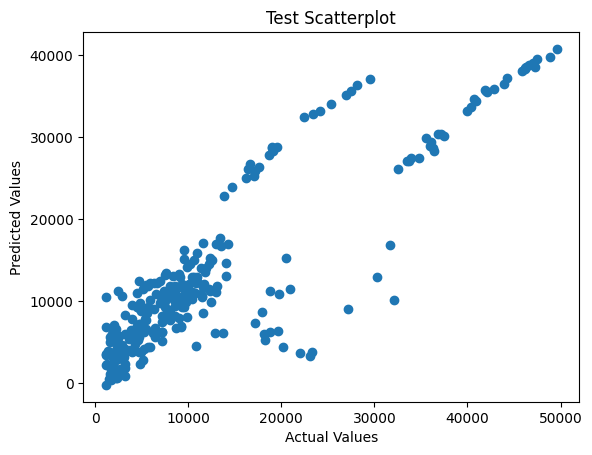

In [74]:
plt.scatter(y_test , y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Test Scatterplot")